# Data Analytics Case Study 3: in-class exercise, weeks 1 & 2

Objectives

By the end of this group activity, students will:
*   Calculate simple and excess returns
*   Handle missing and duplicate values
*   Create and interpret moving averages
*   Visualize trends using Matplotlib
*   Discuss implications for trading strategies

##Task 1: Load and Preview the Data


*   Dataset: tsla.csv (included in  Module 1->Stock Data Overview->DAMO 611 Data Used zip file)

In [1]:
import pandas as pd
import matplotlib as plt

In [2]:
df_tsla = pd.read_csv("C:\\Users\\bruno\\OneDrive - GUSCanada\\T3-MDA-Summer25\\DAMO_611-Case_Study_3\\DAMO 611 Data Used\\tsla.csv")

print(df_tsla.head())

  Symbol        Date   Close    High       Low    Open   Volume
0   TSLA  2015-01-01  222.41  222.41  222.4100  222.41        0
1   TSLA  2015-01-02  219.31  223.25  213.2600  222.63  4764443
2   TSLA  2015-01-05  210.09  216.50  207.1626  214.50  5368477
3   TSLA  2015-01-06  211.28  214.20  204.2100  210.06  6261936
4   TSLA  2015-01-07  210.95  214.78  209.7800  213.40  2968390


##Task 2: Data Cleaning and Preparation



*   Check for and remove rows with any missing values
*   Check for and remove duplicate entries.
*   Convert Date to datetime format and sort the dataset by date.





In [3]:
df_tsla.isnull().sum() # Check for missing values in the DataFrame


Symbol    0
Date      0
Close     0
High      0
Low       0
Open      0
Volume    0
dtype: int64

In [4]:
df_tsla.dropna(inplace=True) # Drop rows with missing values

In [5]:
df_tsla.duplicated().sum() # Check for duplicate rows in the DataFrame

0

In [6]:
df_tsla.drop_duplicates(inplace=True) # Drop duplicate rows

In [7]:
df_tsla['Date'] = pd.to_datetime(df_tsla['Date']) # Convert 'Date' column to datetime
df_tsla.sort_values(by='Date', inplace=True) # Sort DataFrame by 'Date'
print(df_tsla.info()) # Display DataFrame information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 808 entries, 0 to 807
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Symbol  808 non-null    object        
 1   Date    808 non-null    datetime64[ns]
 2   Close   808 non-null    float64       
 3   High    808 non-null    float64       
 4   Low     808 non-null    float64       
 5   Open    808 non-null    float64       
 6   Volume  808 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 44.3+ KB
None


##Task 3: Calculate Returns

*   Calculate simple daily return based on the Close price.
*   Calculate a 5-day annualized return assuming 252 trading days per year.
*   Calculate excess return by subtracting a fixed daily risk-free rate (e.g., 0.01% or 0.0001).









In [8]:
df_tsla['simple_return'] = df_tsla['Close'].pct_change() # Calculate simple returns

# 5-day moving average
df_tsla['5_day_aa_return'] = (1+df_tsla['simple_return'].rolling(window=5).mean())**252-1

# excess returns calculation
risk_free_rate = 0.0001 # Assuming a daily risk-free rate
df_tsla['excess_return'] = df_tsla['simple_return'] - risk_free_rate  # Calculate excess returns

print(df_tsla.head(10)) # Display the first 10 rows of the DataFrame with new columns

  Symbol       Date    Close      High       Low    Open    Volume  \
0   TSLA 2015-01-01  222.410  222.4100  222.4100  222.41         0   
1   TSLA 2015-01-02  219.310  223.2500  213.2600  222.63   4764443   
2   TSLA 2015-01-05  210.090  216.5000  207.1626  214.50   5368477   
3   TSLA 2015-01-06  211.280  214.2000  204.2100  210.06   6261936   
4   TSLA 2015-01-07  210.950  214.7800  209.7800  213.40   2968390   
5   TSLA 2015-01-08  210.615  213.7999  210.0100  212.81   3442509   
6   TSLA 2015-01-09  206.660  209.9800  204.9600  208.80   4668295   
7   TSLA 2015-01-12  202.210  204.4700  199.2500  203.05   5950280   
8   TSLA 2015-01-13  204.250  207.6100  200.9110  203.32   4477320   
9   TSLA 2015-01-14  192.690  195.2000  185.0000  185.83  11551855   

   simple_return  5_day_aa_return  excess_return  
0            NaN              NaN            NaN  
1      -0.013938              NaN      -0.014038  
2      -0.042041              NaN      -0.042141  
3       0.005664         

##Task 4: Moving Averages and Strategy Implementation

*   Calculate 10-day and 50-day moving averages of the Adj Close.
*   Implement a buy signal when MA10 > MA50, else 0 shares.
*   Calculate profit based on whether a share is held.
*   Calculate cumulative wealth.










In [14]:

df_tsla['close_10day_avg'] = df_tsla['Close'].rolling(window=10).mean()
df_tsla['close_50day_avg'] = df_tsla['Close'].rolling(window=50).mean()
df_tsla['shares'] = [1 if df_tsla.loc[i, 'close_10day_avg'] > df_tsla.loc[i, 'close_50day_avg'] else 0 for i in range(len(df_tsla))]  # Buy signal when 10-day average is above 50-day average

df_tsla['profit'] = (df_tsla['Close'] - df_tsla['Close'].shift(1))* df_tsla['shares']  # Calculate profit based on shares bought
df_tsla['cumulative_profit'] = df_tsla['profit'].cumsum()  # Calculate cumulative profit

print(df_tsla[['Date', 'Close', 'close_10day_avg', 'close_50day_avg', 'shares', 'profit', 'cumulative_profit']].tail(50))  # Display relevant columns for the first 20 rows

          Date   Close  close_10day_avg  close_50day_avg  shares  profit  \
758 2017-11-28  317.55          314.051         331.9332       0    0.00   
759 2017-11-29  307.54          313.675         330.6058       0   -0.00   
760 2017-11-30  308.85          313.310         329.4532       0    0.00   
761 2017-12-01  306.53          312.458         328.5620       0   -0.00   
762 2017-12-04  305.20          312.104         327.7662       0   -0.00   
763 2017-12-05  303.70          310.693         326.9352       0   -0.00   
764 2017-12-06  313.26          310.759         326.3810       0    0.00   
765 2017-12-07  311.24          310.623         325.8138       0   -0.00   
766 2017-12-08  315.13          310.581         325.2944       0    0.00   
767 2017-12-11  328.91          311.791         325.0420       0    0.00   
768 2017-12-12  341.03          314.139         324.8998       0    0.00   
769 2017-12-13  339.03          317.288         324.5802       0   -0.00   
770 2017-12-

##Task 5: Visualization



*   Plot Close, MA10, and MA50 over time
*   Plot Cumulative wealth over time

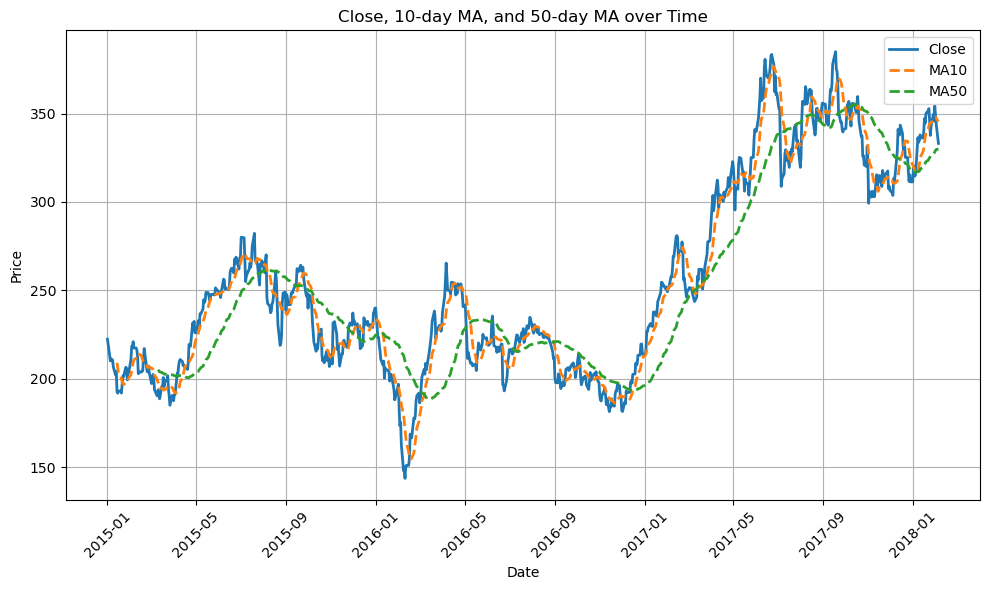

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Plot Close, MA10, and MA50
plt.plot(df_tsla['Date'], df_tsla['Close'], label='Close', linewidth=2)
plt.plot(df_tsla['Date'], df_tsla['close_10day_avg'], label='MA10', linestyle='--', linewidth=2)
plt.plot(df_tsla['Date'], df_tsla['close_50day_avg'], label='MA50', linestyle='--', linewidth=2)

# Formatting the plot
plt.title('Close, 10-day MA, and 50-day MA over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()


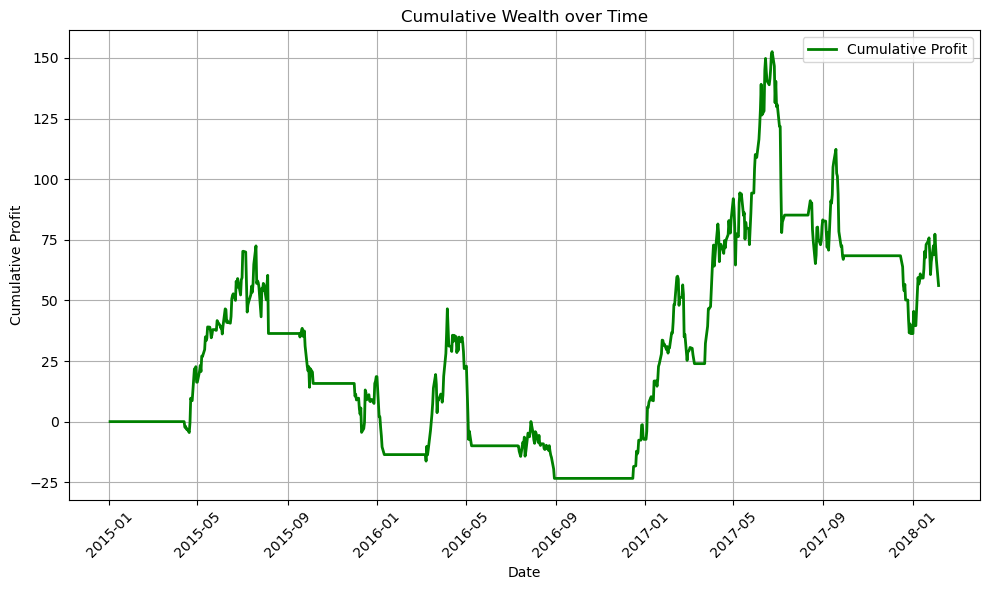

In [16]:
plt.figure(figsize=(10, 6))

# Plot Cumulative Profit (Wealth) over time
plt.plot(df_tsla['Date'], df_tsla['cumulative_profit'], label='Cumulative Profit', color='green', linewidth=2)

# Formatting the plot
plt.title('Cumulative Wealth over Time')
plt.xlabel('Date')
plt.ylabel('Cumulative Profit')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()
